# <center>INDIAN PREMIER LEAGUE ANALYSIS</center>


![Cover](https://ik.imagekit.io/oyprice/bytes/wp-content/uploads/2022/03/ipl-2022-kick-off-on-2nd-aprli-2022-in-chennai-87-800x500.jpg)

## What is Indian Premier League ? 

The Indian Premier League, or just simply called "IPL" is a professional Twenty20 domestic league championship hosted in India and is administrated by the BCCI. It was started after an altercation between the BCCI and the Indian Cricket League. IPL was first launched in 2008 and since then, it has been taking place every year. 

IPL is considered the richest cricket tournament in the world as it generates the most revenue and also pays very high to the participating players. 

This project analyses the data of IPL from 2008 to 2020 and shares various valuable insights on players and much more.

## Libraries used in the dataset 
* numpy (used to work with arrays)
* pandas (used to analyze the data and mark dataframes)
* matplotlib (used to visualize data)
* seaborn (used to add colours and effects into matplotlib visualization)

#### Importing and downloading the dataset

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
general_data = pd.read_csv('/Users/harshthakur/Documents/IPL Dataset/IPL Matches 2008-2020.csv')
stats = pd.read_csv('/Users/harshthakur/Documents/IPL Dataset/IPL Ball-by-Ball 2008-2020.csv')


#### Finding the number of null/empty columns for both the datasets

In [ ]:
general_data.isnull().sum()

In [ ]:
stats.isnull().sum()

#### Finding the number of rows and columns in both the datasets 

In [ ]:
general_data.shape


In [ ]:
stats.shape

The isnull( ) function has helped us determine that the number of rows and columns in the stats file is much more than the general_data file. The ' shape' function shows us that the number of rows and columns in stats file is much bigger than the general_data file. 

#### Number of matches played, number of venues used, and number of teams which have participated

In [8]:
general_data.columns

Index(['Matches', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
print('Total number of matches played: {}'.format(general_data.shape[0]))
print('\nList of Venues used : {}'.format(general_data['city'].unique()))
print('\nList of participating teams: {}'.format(general_data['team1'].unique()))

Total number of matches played: 816

List of Venues used : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

List of participating teams: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


#### Adding a new column 'Season' based on the date that the match was played 

In [330]:
general_data['Season'] = pd.DatetimeIndex(general_data['date']).year
general_data.head()


,Matches,city,date,Man of the Match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [323]:
general_data = general_data.rename(columns= {'id' : 'Matches'}) # Renaming the column 'id' to 'Matches' 

#### Number of matches each season 

In [12]:
matches_per_season = general_data.groupby('Season').Matches.count().reset_index()
matches_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


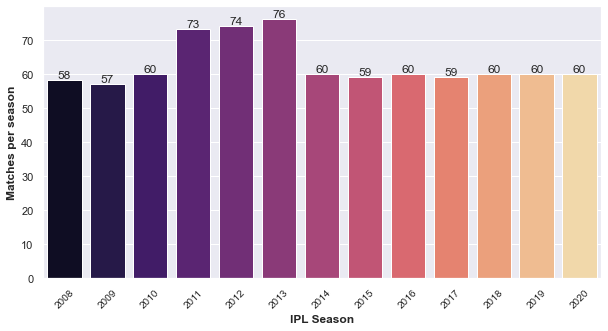

In [317]:
co = plt.axes()
x = sns.countplot(general_data.Season, palette = 'magma');
sns.set(style = 'darkgrid', rc={'figure.figsize':(15,5)})
x.bar_label(x.containers[0])
plt.xticks(fontsize= 10, rotation = 45);
plt.xlabel('IPL Season', fontweight= 'bold')
plt.ylabel('Matches per season',fontweight= 'bold');

In [14]:
general_data = general_data.rename(columns = {'player_of_match' : 'Man of the Match'}) #Renaming the player of the match column

In [ ]:
general_data

In [15]:
stats = stats.rename(columns = {'id': 'Matches'})

#### Total runs scored in each season

In [16]:
season_data = general_data[['Matches', 'Season']].merge(stats, left_on = 'Matches', right_on = 'Matches', how = 'left')

In [17]:
season_data.drop('Matches', axis= 1)
season_data.head()

,Matches,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


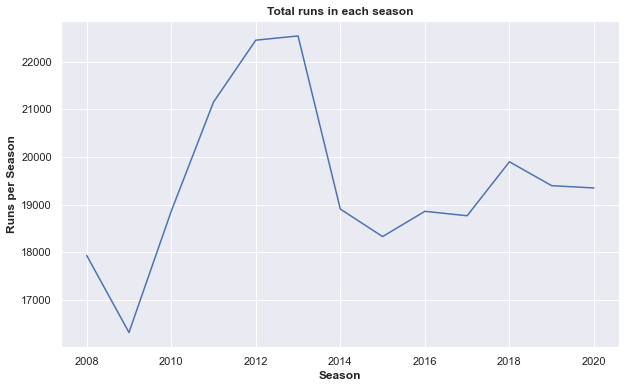

In [187]:
season_runs = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
sns.lineplot(data = season_runs, x= 'Season', y= 'total_runs')
plt.ylabel('Runs per Season', fontweight="bold")
plt.xlabel('Season', fontweight="bold")
plt.title('Total runs in each season',fontsize=12,fontweight="bold");
season_runs


#### Average runs scored per match in each season

In [19]:
season_runs_permatch = pd.concat([season_runs.iloc[:,1], matches_per_season], axis = 1)
season_runs_permatch['Average runs per match'] = season_runs_permatch['total_runs']/ season_runs_permatch['Matches']
season_runs_permatch.rename(columns = {'total_runs': 'Total Runs'})
season_runs_permatch.head()


,total_runs,Season,Matches,Average runs per match
0,17937,2008,58,309.258621
1,16320,2009,57,286.315789
2,18864,2010,60,314.400000
3,21154,2011,73,289.780822
4,22453,2012,74,303.418919


#### TOSS ANALYSIS: Teams with most number of toss wins

In [20]:
toss = general_data['toss_winner'].value_counts()
toss

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

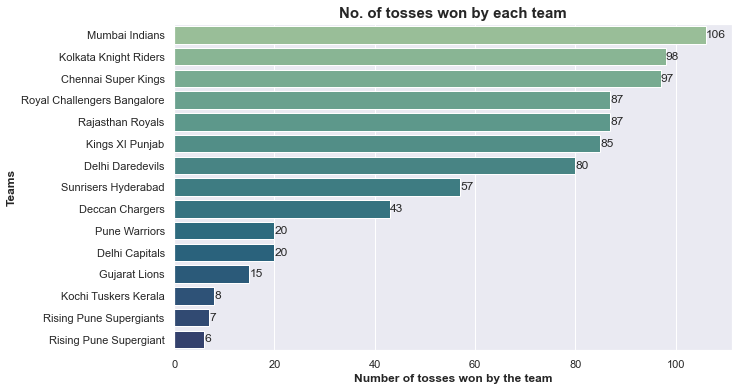

In [179]:
co = plt.axes()
f = sns.barplot(y = toss.index, x = toss, palette = 'crest')
f.bar_label(f.containers[0]);
sns.set(style = 'darkgrid', rc={'figure.figsize':(10,6)})
co.set_title('No. of tosses won by each team', fontsize=15, fontweight="bold",)
plt.xlabel('Number of tosses won by the team', fontweight="bold")
plt.ylabel('Teams', fontweight="bold");

#### Toss decisions after winning the toss accross each season

In [240]:
td  = general_data.groupby(['Season'])['toss_decision'].value_counts()
td

Season  toss_decision
2008    field            32
        bat              26
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    field            48
        bat              25
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    field            41
        bat              19
2015    field            34
        bat              25
2016    field            49
        bat              11
2017    field            48
        bat              11
2018    field            50
        bat              10
2019    field            50
        bat              10
2020    field            33
        bat              27
Name: toss_decision, dtype: int64

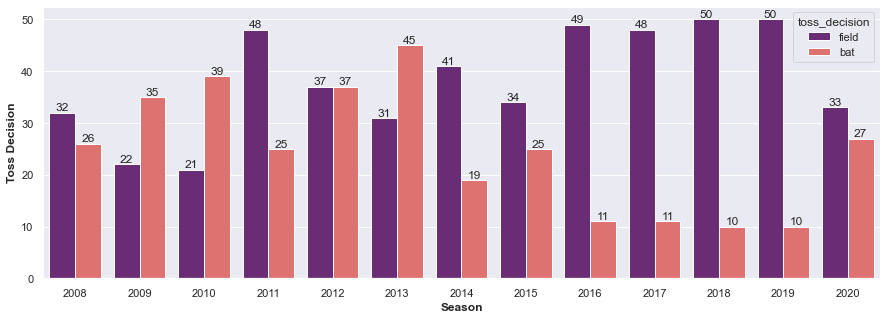

In [229]:
co = plt.axes()
f = sns.countplot(data = general_data, x ='Season', hue='toss_decision',palette="magma");
sns.set(style = 'darkgrid', rc={'figure.figsize':(15,5)})
f.bar_label(f.containers[0]);
f.bar_label(f.containers[1]);
plt.xlabel('Season', fontweight="bold")
plt.ylabel('Toss Decision', fontweight="bold");

Total number of games played in IPL:  816 
Number of times a team has won after winning the toss:  418 
Number of times a team has lost after winning the toss:  398


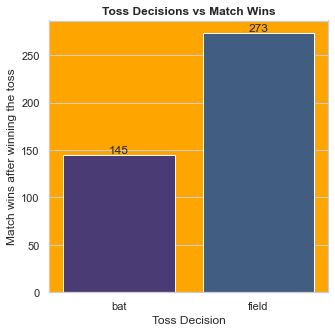

In [547]:
tw = general_data['toss_winner'] == general_data['winner']
twn = general_data['toss_winner'] != general_data['winner']
tw1 = tw.sum()
twn1 = twn.sum()
print('Total number of games played in IPL: ', tw1 + twn1,
       '\nNumber of times a team has won after winning the toss: ', tw1,
      '\nNumber of times a team has lost after winning the toss: ', twn1)

co = plt.axes()
co.set(facecolor= 'orange')
f = sns.countplot(general_data['toss_decision'][general_data.toss_winner == general_data.winner])
sns.set(palette = 'viridis', style = 'whitegrid', rc={'figure.figsize':(5,5)})

f.bar_label(f.containers[0])
plt.xlabel('Toss Decision')
plt.ylabel('Match wins after winning the toss');
plt.title('Toss Decisions vs Match Wins', fontweight="bold");

## BATTING DATA ANALYSIS

#### Top 10 Run Scorers in IPL History

,Batsman,Runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


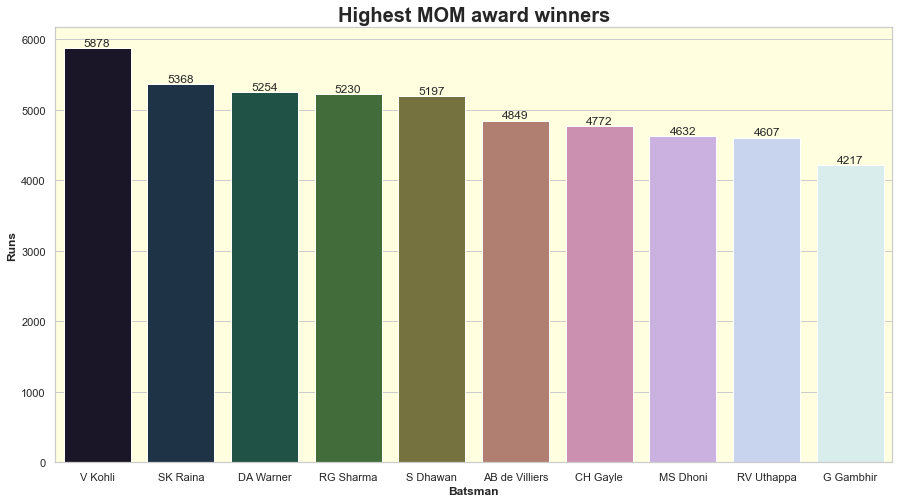

In [543]:
leading_scorers = stats.groupby(['batsman']).batsman_runs.sum().reset_index()
leading_scorers.columns = ['Batsman', 'Runs']
top_ten_runs_scorers = leading_scorers.sort_values('Runs', ascending = False).head(10)

co = plt.axes()
co.set(facecolor= 'lightyellow')
f = sns.barplot(x = top_ten_runs_scorers['Batsman'], y = top_ten_runs_scorers['Runs'], palette = 'cubehelix')
sns.set(style = 'whitegrid', rc={'figure.figsize':(15,8)})
f.bar_label(f.containers[0]);
plt.xlabel('Batsman', fontweight = 'bold')
plt.ylabel("Runs", fontweight = 'bold')
plt.title("Highest MOM award winners",fontsize=20,fontweight="bold")

top_ten_runs_scorers


#### Analysis of IPL's leading run scorer's dismissal pattern (Player : Virat Kohli)

caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64

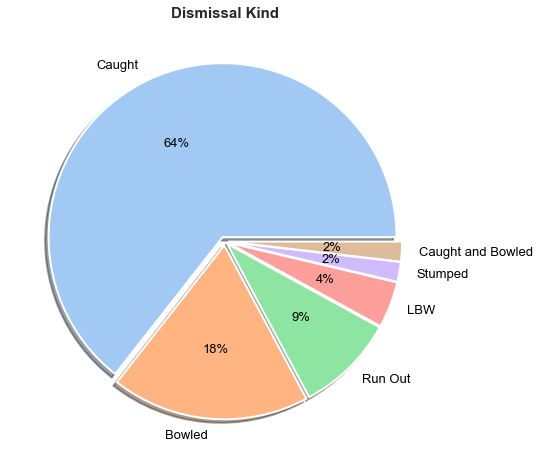

In [475]:
player = stats['batsman'] == 'V Kohli'
kohli_data = stats[player]
kohli_dismissals= kohli_data['dismissal_kind'].value_counts()


colors = sns.color_palette('pastel')[0:6]
explode = [0.027,0.023,0.02,0.02,0.02,0.02]
plt.pie(kohli_dismissals, labels = ['Caught','Bowled','Run Out','LBW', 'Stumped', 'Caught and Bowled'],
        colors= colors ,autopct='%0.0f%%',explode = explode, shadow = 'True',
        textprops = {'color': 'Black','fontsize':13}, wedgeprops = {'linewidth': 2})
plt.title("Dismissal Kind",fontweight="bold",fontsize=15,);
kohli_dismissals

#### Most Man of the Match Award Winners:



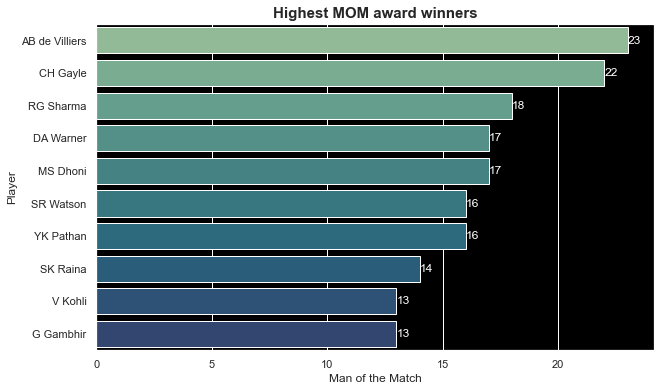

In [540]:
most_mom = general_data['Man of the Match'].value_counts().reset_index()
most_mom.columns= ['Player','Man of the Match']
ten_most_mom= most_mom.head(10)

co = plt.axes()
co.set(facecolor = "black")
f = sns.barplot(y = ten_most_mom['Player'], x = ten_most_mom['Man of the Match'], palette = 'crest')
f.bar_label(f.containers[0], color= 'white')
sns.set(rc={'figure.figsize':(12,6)})
plt.title("Highest MOM award winners",fontsize=15,fontweight="bold")
f;